In [1]:
# DATA SCIENCE SALARIES

# The questions we will try to answer:
# 1. Does remote work has an effect on salary in DS?
# 2. Does company size has an effect on salary in DS?

In [2]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
# Data loading and cleaning

df = pd.read_csv('ds_salaries.csv')
df = df.drop(['Unnamed: 0'], axis = 1)
df['salary_in_usd_k'] = df['salary_in_usd']/1000
df.drop(df[(df['salary_in_usd_k'] > 400)].index, inplace=True)

In [22]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salary_in_usd_k
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,79.833
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,260.000
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,109.024
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,20.000
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,150.000
...,...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M,154.000
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M,126.000
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M,129.000
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M,150.000


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           600 non-null    int64  
 1   experience_level    600 non-null    object 
 2   employment_type     600 non-null    object 
 3   job_title           600 non-null    object 
 4   salary              600 non-null    int64  
 5   salary_currency     600 non-null    object 
 6   salary_in_usd       600 non-null    int64  
 7   employee_residence  600 non-null    object 
 8   remote_ratio        600 non-null    int64  
 9   company_location    600 non-null    object 
 10  company_size        600 non-null    object 
 11  salary_in_usd_k     600 non-null    float64
dtypes: float64(1), int64(4), object(7)
memory usage: 60.9+ KB


In [24]:
# How many different company sizes are in the DataFrame?

company_sizes= df.company_size.unique()
print(company_sizes)

['L' 'S' 'M']


In [25]:
# How many different remote ratios are in the DataFrame?

remote_ratios= df.remote_ratio.unique()
print(remote_ratios)

[  0  50 100]


In [26]:
df.isnull().values.any()

False

In [27]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio,salary_in_usd_k
count,600.000000,6.000000e+02,600.000000,600.000000,600.000000
mean,2021.411667,3.225201e+05,108348.011667,70.833333,108.348012
std,0.690163,1.553279e+06,60763.132982,40.748083,60.763133
min,2020.000000,4.000000e+03,2859.000000,0.000000,2.859000
25%,2021.000000,6.999975e+04,62650.500000,50.000000,62.650500
50%,2022.000000,1.129000e+05,100000.000000,100.000000,100.000000
75%,2022.000000,1.603955e+05,150000.000000,100.000000,150.000000
max,2022.000000,3.040000e+07,380000.000000,100.000000,380.000000


In [28]:
df.describe(include=['O'])

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,600,600,600,600,600,600,600
unique,4,4,49,17,57,50,3
top,SE,FT,Data Scientist,USD,US,US,M
freq,278,582,142,391,325,348,325


In [29]:
# DATA VISUALIZATION

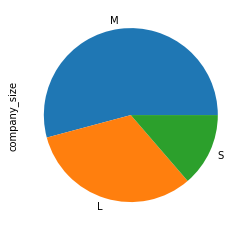

In [12]:
df['company_size'].value_counts().plot(kind="pie")
plt.show()

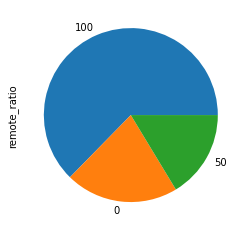

In [13]:
df['remote_ratio'].value_counts().plot(kind="pie")
plt.show()

In [14]:
df2 = df.groupby(df.remote_ratio).mean()
df2

,work_year,salary,salary_in_usd,salary_in _usd_k
remote_ratio,,,,
0,2021.507937,216307.746032,103627.277778,103.627278
50,2020.908163,710926.520408,77331.428571,77.331429
100,2021.510638,256878.890957,118014.069149,118.014069


In [34]:
df2 = df.groupby(df.company_size).mean()
df2

,work_year,salary,salary_in_usd,remote_ratio,salary_in_usd_k
company_size,,,,,
L,2021.067358,597211.253886,110466.906736,68.134715,110.466907
M,2021.756923,145588.723077,115880.560000,72.769231,115.880560
S,2020.853659,377243.060976,73506.243902,69.512195,73.506244


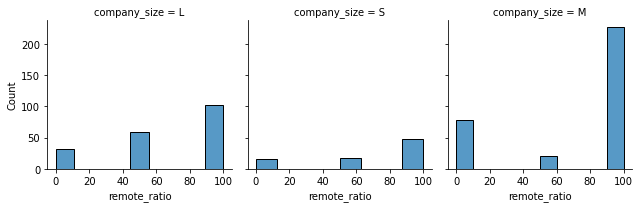

In [15]:
g = sns.FacetGrid(df, col="company_size")
g.map_dataframe(sns.histplot, "remote_ratio")

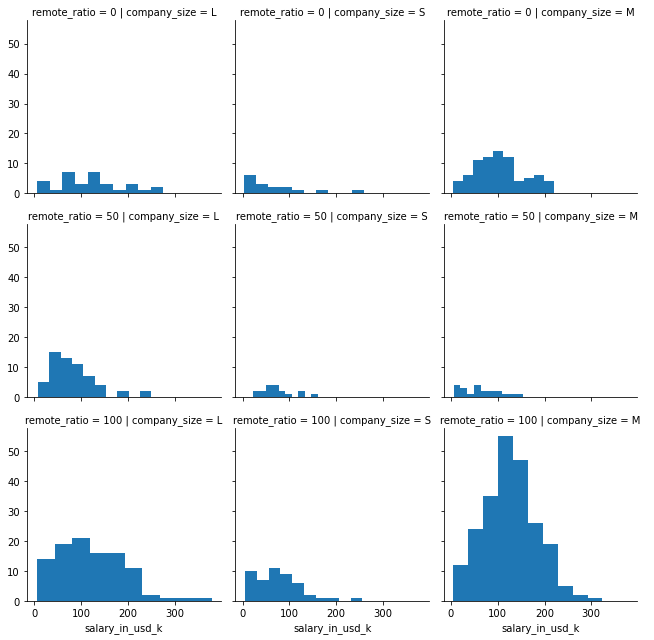

In [30]:
grid = sns.FacetGrid(df, col='company_size', row='remote_ratio')
grid.map(plt.hist, 'salary_in_usd_k')
grid.add_legend();
g.savefig('Salaries histograms per remote ratio adn company size.png')

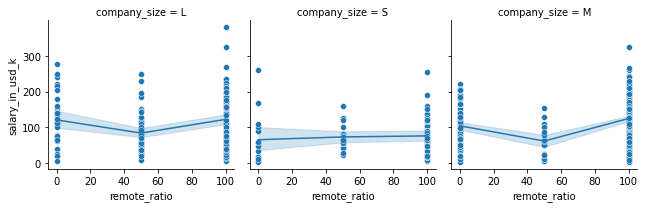

In [31]:
g = sns.FacetGrid(df, col="company_size")
g.map_dataframe(sns.scatterplot, x="remote_ratio", y="salary_in_usd_k")
g.map_dataframe(sns.lineplot, x="remote_ratio", y="salary_in_usd_k")
g.add_legend()
g.savefig('Salaries distribution per remote ratio.png')

In [33]:
df[['company_size', 'salary_in_usd_k']].groupby(['company_size'], as_index=False).mean().sort_values(by='salary_in_usd_k', ascending=True)

,company_size,salary_in_usd_k
2,S,73.506244
0,L,110.466907
1,M,115.880560


In [ ]:
df[['remote_ratio', 'salary_in_usd_k']].groupby(['remote_ratio'], as_index=False).mean().sort_values(by='salary_in _usd_k', ascending=True)

In [ ]:
sns.heatmap(df.corr().round(1), annot=True)